**Goal:** Is to develop a machine learning approach to make predictions on the House Price which is a regression task.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (22, 10)

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)

# Exploratory Data Analysis & Pre-processing

In [2]:
dataPath = '/home/daniel/Desktop/programming/pythondatascience/datascience/c_sharp/learn_resources/C-sharp-tutorials/laptop-price-prediction/src/LaptopPriceTrainer'
data = pd.read_csv(os.path.join(dataPath,'laptoppricesUS.csv'), delimiter='\t')
print(data.shape)
print(data.info())
data.head()

(469, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CPU      469 non-null    object 
 1   GHz      469 non-null    float64
 2   GPU      469 non-null    object 
 3   RAM      469 non-null    int64  
 4   RAMType  469 non-null    object 
 5   Screen   469 non-null    float64
 6   Storage  469 non-null    int64  
 7   SSD      469 non-null    bool   
 8   Weight   469 non-null    float64
 9   Price    469 non-null    int64  
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 33.6+ KB
None


,CPU,GHz,GPU,RAM,RAMType,Screen,Storage,SSD,Weight,Price
0,i5,1.8,intel,4,ddr3,13.3,128,True,1.4,527
1,i5,2.5,intel,4,ddr3,13.3,500,False,2.0,527
2,i5,2.5,intel,8,ddr3,13.3,500,False,2.0,558
3,i5,1.4,intel,4,ddr3,11.6,128,True,1.0,485
4,i5,1.3,intel,4,ddr3,11.6,128,True,1.0,421


# Target Exploration (Price)

In [3]:
data['SSD'] = 1*data.SSD
data.groupby('Price').first()

,CPU,GHz,GPU,RAM,RAMType,Screen,Storage,SSD,Weight
Price,,,,,,,,,
157,i3,2.4,intel,4,ddr3,13.0,500,0,1.70
158,i5,2.5,intel,4,ddr3,14.0,320,0,2.00
181,i5,2.6,intel,4,ddr3,14.0,320,0,2.33
199,i3,2.4,intel,4,ddr3,13.0,500,0,1.70
210,i5,2.5,intel,4,ddr3,14.0,128,1,2.13
...,...,...,...,...,...,...,...,...,...
1310,i7,2.6,nvidia,16,ddr4,15.0,512,1,2.00
1470,i7,2.6,nvidia,16,ddr4,15.0,512,1,2.50
1581,i7,2.6,intel,8,ddr4,15.6,240,0,2.60


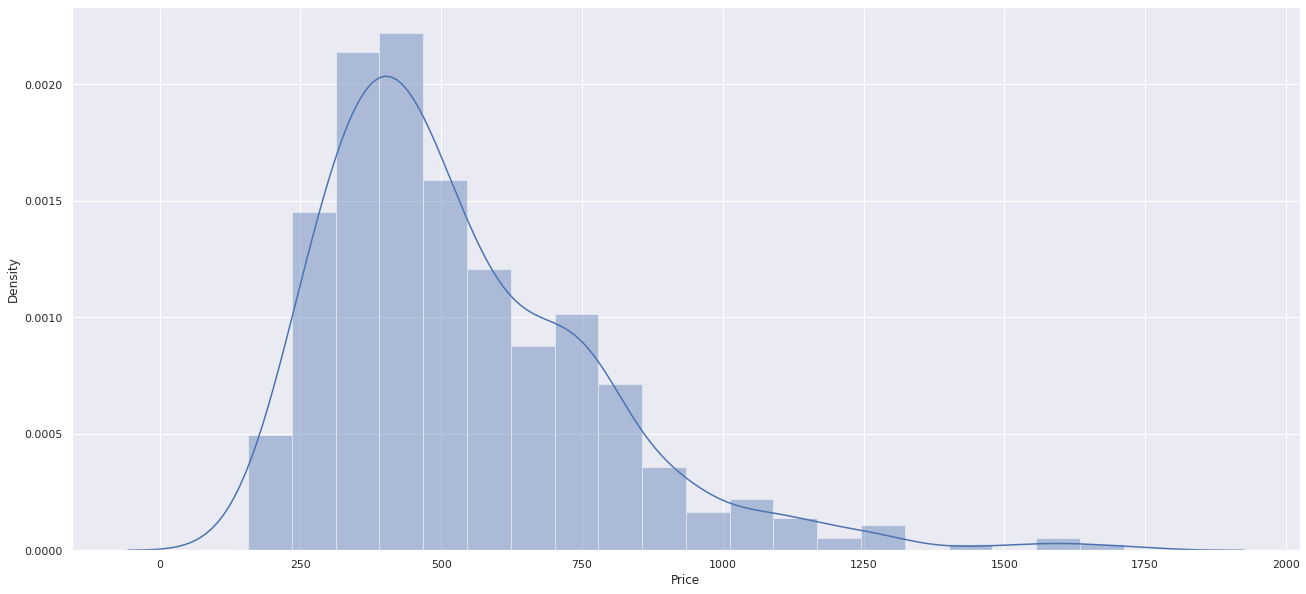

In [4]:
sns.distplot(data.Price)
plt.show()

The Price column follows near a **Guassian distribution**

# Check for Missing Values

In [5]:
data.isnull().sum()

CPU        0
GHz        0
GPU        0
RAM        0
RAMType    0
Screen     0
Storage    0
SSD        0
Weight     0
Price      0
dtype: int64

# Check for Outliers

In [6]:
def detect_outliers(df, col, remove_outlier = True):
    
    """
    Function to detect the presence of Outliers in a column
    when remove_outler = False or to remove 
    Outliers when remove_outler = True
    
    Args:
        df (Dataframe) : dataframe of the data
        col (string) : column name of the data
    
    Returns:
        float : detected outliers
    """
    
    if remove_outlier:
        # 1st quantile is 1%
        Q1 = df[col].quantile(0.01)
        # 3rd quantile is 99%
        Q3 = df[col].quantile(0.99)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR

        return df.loc[~((df[col] < lower_limit) | (df[col] > upper_limit))]
    
    else:
        
        Q1 = df[col].quantile(0.01)
        Q3 = df[col].quantile(0.99)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR

        return df.loc[((data[col] < lower_limit) | (df[col] > upper_limit))]

In [7]:
data.describe()

,GHz,RAM,Screen,Storage,SSD,Weight,Price
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,2.240085,8.904051,13.627505,221.466951,0.893390,1.717846,533.867804
std,0.361521,4.304808,1.140939,117.663423,0.308946,0.495570,243.604309
min,1.100000,4.000000,11.000000,120.000000,0.000000,0.900000,157.000000
25%,2.200000,8.000000,12.500000,128.000000,1.000000,1.400000,358.000000
50%,2.300000,8.000000,14.000000,180.000000,1.000000,1.600000,474.000000
75%,2.500000,8.000000,14.000000,256.000000,1.000000,1.900000,664.000000
max,3.100000,32.000000,17.300000,750.000000,1.000000,3.460000,1712.000000


In [8]:
detect_outliers(data, 'GHz', remove_outlier=False)

,CPU,GHz,GPU,RAM,RAMType,Screen,Storage,SSD,Weight,Price


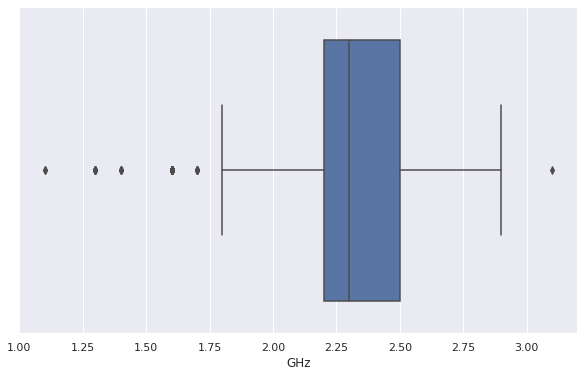

In [9]:
plt.figure(figsize = (10, 6))
sns.boxplot(data.GHz)
plt.show()

In [10]:
detect_outliers(data, 'RAM', remove_outlier=False)

,CPU,GHz,GPU,RAM,RAMType,Screen,Storage,SSD,Weight,Price


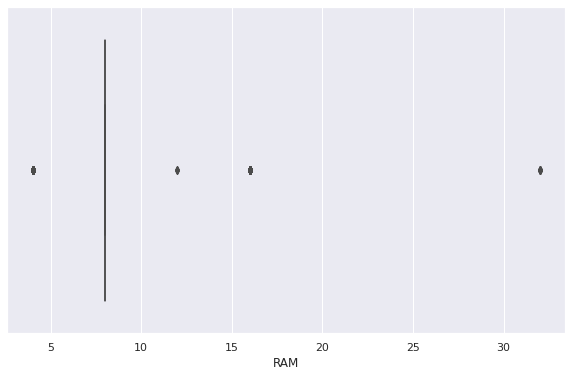

In [11]:
plt.figure(figsize = (10, 6))
sns.boxplot(data.RAM)
plt.show()

In [12]:
detect_outliers(data, 'Screen', remove_outlier=False)

,CPU,GHz,GPU,RAM,RAMType,Screen,Storage,SSD,Weight,Price


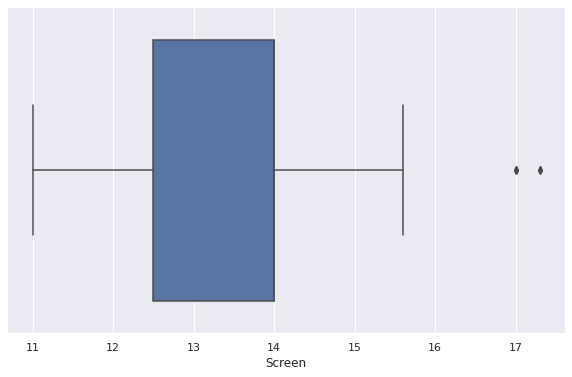

In [13]:
plt.figure(figsize = (10, 6))
sns.boxplot(data.Screen)
plt.show()

In [14]:
detect_outliers(data, 'Storage', remove_outlier=False)

,CPU,GHz,GPU,RAM,RAMType,Screen,Storage,SSD,Weight,Price


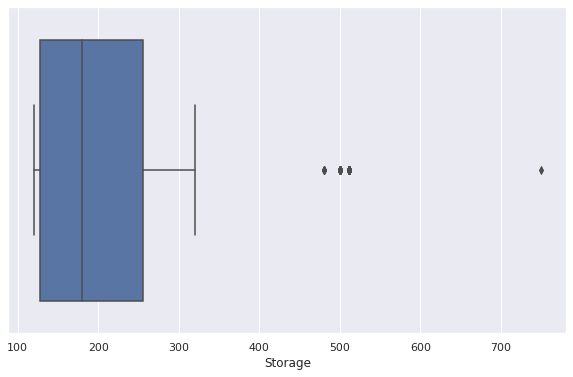

In [15]:
plt.figure(figsize = (10, 6))
sns.boxplot(data.Storage)
plt.show()

In [16]:
detect_outliers(data, 'Weight', remove_outlier=False)

,CPU,GHz,GPU,RAM,RAMType,Screen,Storage,SSD,Weight,Price


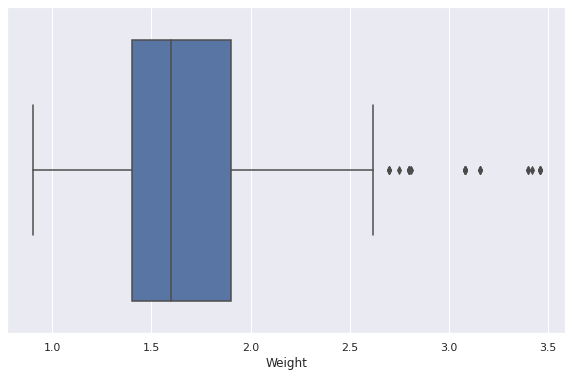

In [17]:
plt.figure(figsize = (10, 6))
sns.boxplot(data.Weight)
plt.show()

No Outlier present in the numerical columns

## Working with Categorical Columns

In [18]:
categorical_feats = data.select_dtypes(['object'])
categorical_feats.head()

,CPU,GPU,RAMType
0,i5,intel,ddr3
1,i5,intel,ddr3
2,i5,intel,ddr3
3,i5,intel,ddr3
4,i5,intel,ddr3


In [19]:
categorical_feats.CPU.value_counts()

i5     326
i7     104
i3      30
a10      7
m        1
m5       1
Name: CPU, dtype: int64

In [20]:
categorical_feats.GPU.value_counts()

intel      394
nvidia      49
amd         19
firepro      3
radeon       3
geforce      1
Name: GPU, dtype: int64

In [21]:
categorical_feats.RAMType.value_counts()

ddr3    300
ddr4    169
Name: RAMType, dtype: int64

In [22]:
data.to_csv("laptoppricesnew.csv")